# 10 Analyzing mosaic plots

In [1]:
%%html
<iframe width="700" height="400" src="https://www.youtube.com/embed/2sHkluggZp8/" frameborder="0" allowfullscreen></iframe>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
import findspark

findspark.init()
from pyspark.context import SparkContext
from pyspark.sql import functions as F
from pyspark.sql.session import SparkSession

spark = SparkSession.builder.appName("statistics").master("local").getOrCreate()

[khanacademy](https://www.khanacademy.org/math/ap-statistics/analyzing-categorical-ap/xfb5d8e68:mosaic-plots/v/analyzing-mosaic-plots?modal=1)

![Analyzing mosaic plots fig 1](./imgs/01-09-01.png)

In [3]:
dataset = {
    "surveyees": ["Students", "Staff", "Parents"],
    "No": [800, 60, 150],
    "Yes": [200, 240, 150],
}

In [4]:
df = pd.DataFrame(dataset).set_index("surveyees")
df

,No,Yes
surveyees,,
Students,800,200
Staff,60,240
Parents,150,150


In [5]:
sdf = spark.createDataFrame(zip(*dataset.values()), schema=list(dataset.keys()))
sdf.show()

+---------+---+---+
|surveyees| No|Yes|
+---------+---+---+
| Students|800|200|
|    Staff| 60|240|
|  Parents|150|150|
+---------+---+---+



(<Figure size 432x288 with 3 Axes>,
 {('Students', 'No'): (0.0, 0.0, 0.6188118811881188, 0.7973421926910299),
  ('Students', 'Yes'): (0.0,
   0.8006644518272424,
   0.6188118811881188,
   0.19933554817275742),
  ('Staff', 'No'): (0.6237623762376238,
   0.0,
   0.18564356435643564,
   0.19933554817275748),
  ('Staff', 'Yes'): (0.6237623762376238,
   0.2026578073089701,
   0.18564356435643564,
   0.7973421926910299),
  ('Parents', 'No'): (0.8143564356435643,
   0.0,
   0.18564356435643564,
   0.4983388704318937),
  ('Parents', 'Yes'): (0.8143564356435643,
   0.5016611295681063,
   0.18564356435643564,
   0.4983388704318937)})

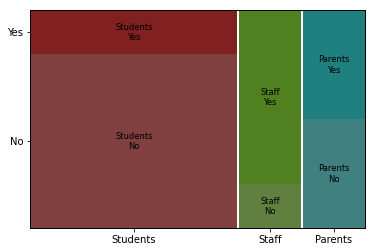

In [6]:
mosaic(df.stack())